# 1. Import thư viện

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib # Thư viện để lưu model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Cấu hình hiển thị
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')


# Hiển thị dữ liệu

In [61]:
print("🚀 Đang đọc dữ liệu sạch 'master_data.csv'...")
try:
    # THÊM THAM SỐ: on_bad_lines='skip' và engine='python'
    df = pd.read_csv('master_data.csv', on_bad_lines='skip', engine='python')
    
    print(f"✅ Đã load thành công {len(df)} dòng dữ liệu.")
    print("📝 5 dòng đầu tiên:")
    display(df.head(5))

except FileNotFoundError:
    print("❌ LỖI: Không tìm thấy file. Hãy chắc chắn bạn đã chạy xong code Ngày 1-2.")
except Exception as e:
    print(f"❌ Lỗi khác: {e}")

🚀 Đang đọc dữ liệu sạch 'master_data.csv'...
✅ Đã load thành công 110012 dòng dữ liệu.
📝 5 dòng đầu tiên:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delivery_days,is_late,review_binary
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,8,0,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,13,0,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,9,0,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,13,0,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,2,0,1


In [62]:
import pandas as pd

# 1. Đọc file
df = pd.read_csv('master_data.csv', on_bad_lines='skip', engine='python')

# 2. In ra tất cả tên cột đang có
print("Danh sách cột hiện có:", df.columns.tolist())

# 3. Kiểm tra xem 'review_binary' có nằm trong đó không?
if 'review_binary' in df.columns:
    print("✅ CÓ cột 'review_binary'.")
else:
    print("❌ KHÔNG CÓ cột 'review_binary'. Bạn đang đọc nhầm file cũ rồi!")

Danh sách cột hiện có: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'delivery_days', 'is_late', 'review_binary']
✅ CÓ cột 'review_binary'.


# 2. Chuẩn bị dữ liệu

## 2.1. Tạo biến Thể tích

In [63]:
# Cần fillna(0) hoặc fillna(trung bình) để tránh lỗi nhân với Null
df['product_volume_cm3'] = (
    df['product_length_cm'].fillna(0) * df['product_height_cm'].fillna(0) * df['product_width_cm'].fillna(0)
)

## 2.2. Chọn biến

In [64]:
features = [
    'price',                # Giá trị
    'freight_value',        # Phí ship
    'delivery_days',        # Thời gian giao
    'is_late',              # Trễ hẹn
    'product_weight_g',     # Cân nặng
    'product_volume_cm3',
    'product_description_lenght',
    'product_photos_qty'    # ĐỘ CỒNG KỀNH (Thay vì dùng 3 biến lẻ)
]

target = 'review_binary'

print(f"-> Các biến dùng để chạy mô hình: {features}")

-> Các biến dùng để chạy mô hình: ['price', 'freight_value', 'delivery_days', 'is_late', 'product_weight_g', 'product_volume_cm3', 'product_description_lenght', 'product_photos_qty']


## 2.3. Lọc dữ liệu sạch 

In [65]:
data_model = df[features + [target]].dropna()
print(f"-> Số lượng mẫu sạch: {len(data_model)} dòng")

-> Số lượng mẫu sạch: 108478 dòng


## 2.4. Chia tập train/test

In [66]:
X = data_model[features]
y = data_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"-> Kích thước tập Train: {X_train.shape}")
print(f"-> Kích thước tập Test: {X_test.shape}")

-> Kích thước tập Train: (86782, 8)
-> Kích thước tập Test: (21696, 8)


In [67]:
# 5. Huấn luyện Random Forest
print("\n🤖 Đang huấn luyện Random Forest...")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)



🤖 Đang huấn luyện Random Forest...


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [68]:
# 6. Đánh giá
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ ĐỘ CHÍNH XÁC: {acc*100:.2f}%")

✅ ĐỘ CHÍNH XÁC: 82.19%


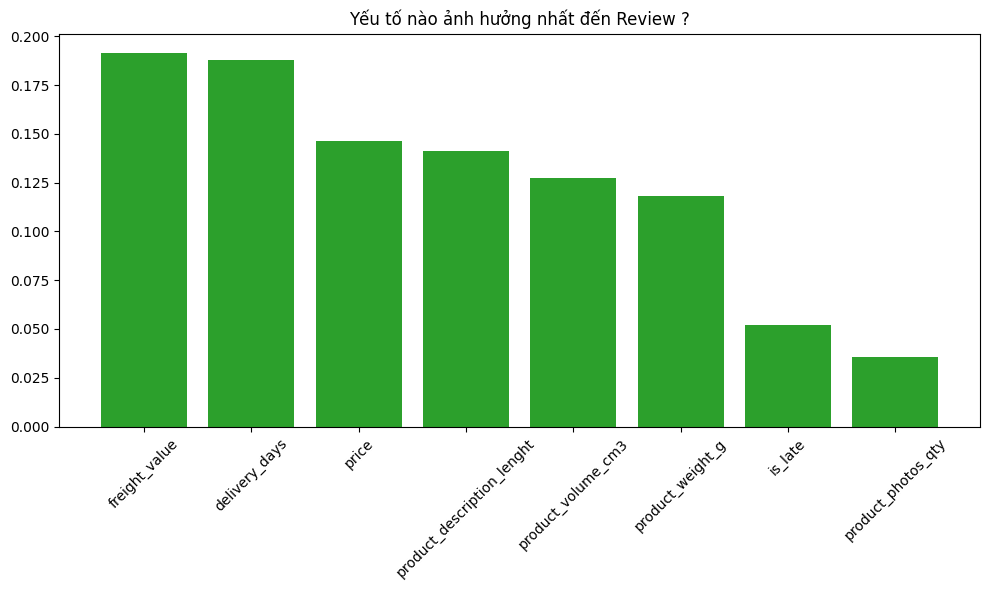

In [72]:
# 7. Vẽ biểu đồ Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6 ))
plt.title("Yếu tố nào ảnh hưởng nhất đến Review ?")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='#2ca02c')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()